# Analysis

In [3]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("FinalSalaries.csv")
df.head()

,Country,Employment,FormalEducation,DevType,YearsCodingProf,EducationTypes,Age,Salary,ConvertedSalary
0,United Kingdom,Employed full-time,Medium,Database administrator,19,"Taught yourself a new language, framework, or ...",40,51000.0,70841.0
1,United Kingdom,Employed full-time,Medium,Back-end developer,5,Received on-the-job training in software devel...,21,30000.0,41671.0
2,United States,Employed full-time,Medium,Back-end developer,1,Received on-the-job training in software devel...,21,120000.0,120000.0
3,United States,Employed full-time,Medium,Back-end developer,22,Taken an online course in programming or softw...,40,250000.0,250000.0
4,United Kingdom,Employed full-time,Medium,Back-end developer,7,"Taught yourself a new language, framework, or ...",30,25.0,420.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26085 entries, 0 to 26084
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          26085 non-null  object 
 1   Employment       26085 non-null  object 
 2   FormalEducation  26085 non-null  object 
 3   DevType          26085 non-null  object 
 4   YearsCodingProf  26085 non-null  int64  
 5   EducationTypes   26085 non-null  object 
 6   Age              26085 non-null  object 
 7   Salary           26085 non-null  float64
 8   ConvertedSalary  26085 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 1.8+ MB


**One Hot Encoding**

In [6]:
X = df.drop(['Salary',"ConvertedSalary","EducationTypes"], axis=1)
y = df["ConvertedSalary"].values

In [56]:
X.head()

,Country,Employment,FormalEducation,DevType,YearsCodingProf,Age
0,United Kingdom,Employed full-time,Medium,Database administrator,19,40
1,United Kingdom,Employed full-time,Medium,Back-end developer,5,21
2,United States,Employed full-time,Medium,Back-end developer,1,21
3,United States,Employed full-time,Medium,Back-end developer,22,40
4,United Kingdom,Employed full-time,Medium,Back-end developer,7,30


In [7]:
X["Country"].value_counts()

United States     12769
India              4231
United Kingdom     3721
Germany            3399
Canada             1965
Name: Country, dtype: int64

In [8]:
X["Employment"].value_counts()

Employed full-time        22611
Independent contractor     1736
Employed part-time         1022
looking for work            716
Name: Employment, dtype: int64

In [9]:
X["FormalEducation"].value_counts()

Medium    18055
High       6096
Low        1934
Name: FormalEducation, dtype: int64

In [10]:
X["DevType"].value_counts()

Back-end developer                               15479
Full-stack developer                              2446
Front-end developer                               1636
Mobile developer                                   990
Desktop or enterprise applications developer       939
Data or business analyst                           807
Data scientist or machine learning specialist      688
Designer                                           607
DevOps specialist                                  488
Embedded applications or devices developer         423
Database administrator                             329
Engineering manager                                275
Student                                            251
C-suite executive (CEO, CTO, etc.)                 239
QA or test developer                               199
Educator or academic researcher                    124
Game or graphics developer                          72
System administrator                                72
Product ma

In [13]:
X["DevType"].unique()

array(['Database administrator', 'Back-end developer', 'Mobile developer',
       'Full-stack developer', 'Designer', 'Front-end developer',
       'Engineering manager',
       'Embedded applications or devices developer',
       'Data scientist or machine learning specialist',
       'Desktop or enterprise applications developer',
       'C-suite executive (CEO, CTO, etc.)', 'QA or test developer',
       'System administrator', 'Data or business analyst',
       'DevOps specialist', 'Educator or academic researcher', 'Student',
       'Game or graphics developer', 'Product manager',
       'Marketing or sales professional'], dtype=object)

In [11]:
X["YearsCodingProf"].value_counts()

5     7286
1     5995
7     3924
10    2763
13    1621
19    1209
16    1206
22     605
30     547
25     386
0      325
28     218
Name: YearsCodingProf, dtype: int64

In [17]:
len(X["YearsCodingProf"].unique())

12

In [12]:
X["Age"].value_counts()

30                   14191
40                    4965
21                    4804
50                    1541
60                     420
18                     120
65 years or older       44
Name: Age, dtype: int64

In [57]:
y.shape

(26085,)

In [58]:
# Encoding categorical features #
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown = 'ignore')

In [59]:
# column transformer #
from sklearn.compose import make_column_transformer

In [60]:
column_transform = make_column_transformer(
    (OneHotEncoder(handle_unknown = 'ignore'), ["Country", "Employment", "FormalEducation", "DevType"]),
    remainder="passthrough"
)

In [61]:
column_transform.fit_transform(X)

ValueError: For a sparse output, all columns should be a numeric or convertible to a numeric.

In [62]:
X["Age"].unique()

array(['40', '21', '30', '50', '60', '65 years or older', '18'],
      dtype=object)

In [63]:
X["Age"].replace("65 years or older","65",inplace=True)

In [64]:
X["Age"].unique()

array(['40', '21', '30', '50', '60', '65', '18'], dtype=object)

In [65]:
column_transform.fit_transform(X)

<26085x34 sparse matrix of type '<class 'numpy.float64'>'
	with 156185 stored elements in Compressed Sparse Row format>

**Train test split**

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

**Pipeline**

In [68]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

In [69]:
lm = LinearRegression()

In [70]:
# Put all these steps into a Pipeline #
from sklearn.pipeline import make_pipeline

In [71]:
# Order of application. First colum transform then apply logistic regression #
pipe_lm = make_pipeline(column_transform, lm)

In [72]:
np.mean(cross_val_score(pipe_lm,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

-87824.57316264497

In [73]:
# lasso regression 
lm_l = Lasso(alpha=.13)
pipe_lm_l = make_pipeline(column_transform,lm_l)
np.mean(cross_val_score(pipe_lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 100209710296875.12, tolerance: 57740709975.80265
  model = cd_fast.sparse_enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 180092294645270.84, tolerance: 66755724535.010475
  model = cd_fast.sparse_enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10167812081402.625, tolerance: 66762995719.023
  model = cd_fast.sparse_enet_coordinate_descent(


-87823.93878550506

In [76]:
# test ensembles 
pipe_lm.fit(X_train,y_train)
pipe_lm_l.fit(X_train,y_train)

tpred_lm = pipe_lm.predict(X_test)
tpred_lml = pipe_lm_l.predict(X_test)

from sklearn.metrics import mean_absolute_error
print("linear regression mean absolute error: ", mean_absolute_error(y_test,tpred_lm))
print("lasso regression mean absolute error: ", mean_absolute_error(y_test,tpred_lml))

linear regression mean absolute error:  1.6041352073411545e+27
lasso regression mean absolute error:  1.6041352073411545e+27


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15080671595442.375, tolerance: 95641680769.55528
  model = cd_fast.sparse_enet_coordinate_descent(


**Linear model is better from crossval**

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

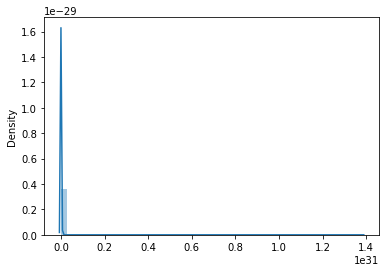

In [75]:
sns.distplot((y_test-tpred_lm),bins=50)

In [77]:
import pickle
filename = "linear_reg_model.sav"
pickle.dump(pipe_lm, open(filename, "wb"))

In [78]:
# load the model from disk
filename = 'linear_reg_model.sav'
linear_reg_model_reloaded = pickle.load(open(filename, 'rb'))

**new data test**

In [79]:
def salary_prediction(model,new_data):
    salary = model.predict(new_data)
    return salary

In [80]:
X.columns

Index(['Country', 'Employment', 'FormalEducation', 'DevType',
       'YearsCodingProf', 'Age'],
      dtype='object')

In [81]:
pd.DataFrame(columns=X.columns)

,Country,Employment,FormalEducation,DevType,YearsCodingProf,Age


In [88]:
X_new_entry = pd.DataFrame(columns=X.columns)
my_entry = ["United States", "Employed full-time","High","Database administrator","2","25"]

X_new_entry.loc[len(X_new_entry)] = my_entry
X_new_entry

,Country,Employment,FormalEducation,DevType,YearsCodingProf,Age
0,United States,Employed full-time,High,Database administrator,2,25


In [89]:
linear_reg_model_reloaded.predict(X_new_entry)

array([128369.04116607])

In [103]:
# Another 1 # 
X_new_entry2 = pd.DataFrame(columns=X.columns)
my_entry2 = ["India", "Employed full-time","Medium","Data scientist or machine learning specialist","2","25"]

X_new_entry2.loc[len(X_new_entry2)] = my_entry2
X_new_entry2

,Country,Employment,FormalEducation,DevType,YearsCodingProf,Age
0,India,Employed full-time,Medium,Data scientist or machine learning specialist,2,25


In [106]:
linear_reg_model_reloaded.predict(X_new_entry2)

array([5513.22050115])

In [107]:
# Another 2 # 
X_new_entry3 = pd.DataFrame(columns=X.columns)
my_entry3 = ["Canada", "Employed full-time","Medium","Data scientist or machine learning specialist","2","25"]

X_new_entry3.loc[len(X_new_entry3)] = my_entry3
X_new_entry3
linear_reg_model_reloaded.predict(X_new_entry3)

array([70623.12384017])

In [109]:
# turns a list into a dataframe #
def make_list_to_df(list):
    df = pd.DataFrame(columns=X.columns)
    df.loc[len(df)] = list
    return df

In [110]:
make_list_to_df(["Canada", "Employed full-time","Medium","Data scientist or machine learning specialist","2","25"])

,Country,Employment,FormalEducation,DevType,YearsCodingProf,Age
0,Canada,Employed full-time,Medium,Data scientist or machine learning specialist,2,25


In [2]:
X.columns()

NameError: name 'X' is not defined